In [720]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [721]:
df = pd.read_csv(r"C:\Users\ggfor\Downloads\Updated_sales.csv", delimiter= ",")

## For this notebook, i will go through the whole cycle of Data Science with Updated_sales dataset. Where sales or prices are the dependent variable 
# Here is a break down of the notebook
    1- General Data understanding & Cleaning
    2- In-depth understanding of Each column & Feature Engineering  
    3- Write Data to mysql's Database 
    4- Prepare Data for machine Learning
    5- Linear reg
    6- clustring

## 1- General Data understanding & Cleaning

In [722]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,30307,30307,30307,30307,30307,30307
unique,29019,20,9,24,23316,27854
top,Order ID,Lightning Charging Cable,1,14.95,Order Date,Purchase Address
freq,61,3556,27405,3556,61,61


In [723]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30394 entries, 0 to 30393
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          30307 non-null  object
 1   Product           30307 non-null  object
 2   Quantity Ordered  30307 non-null  object
 3   Price Each        30307 non-null  object
 4   Order Date        30307 non-null  object
 5   Purchase Address  30307 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [724]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
30389,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016"
30390,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215"
30391,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101"
30392,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016"


In [725]:
df[pd.isna(df["Order ID"])]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
28132,NaN,NaN,NaN,NaN,NaN,NaN
28879,NaN,NaN,NaN,NaN,NaN,NaN
29097,NaN,NaN,NaN,NaN,NaN,NaN
29247,NaN,NaN,NaN,NaN,NaN,NaN


In [726]:
df[pd.isna(df["Order ID"])].isna().sum()

Order ID            87
Product             87
Quantity Ordered    87
Price Each          87
Order Date          87
Purchase Address    87
dtype: int64

### It is clear that at specific rows, all the columns have null values and therfore will not contribute any information. Thus, we must <span style="color: red;"> Remove </span> these rows 

In [727]:
df= df[~pd.isna(df["Order ID"])]

In [728]:
df.isna().any().any()

False

In [729]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30307 entries, 0 to 30393
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          30307 non-null  object
 1   Product           30307 non-null  object
 2   Quantity Ordered  30307 non-null  object
 3   Price Each        30307 non-null  object
 4   Order Date        30307 non-null  object
 5   Purchase Address  30307 non-null  object
dtypes: object(6)
memory usage: 1.6+ MB


### For some reason the Quantity and Price Each columns are of type object not int nor float

In [730]:
#df["Quantity Ordered"].apply(lambda x : float(x))
#df["Price Each"].apply(lambda x : float(x))

### This code that tries to convert the columns from object to int results in very weird error

In [731]:
df["Quantity Ordered"].value_counts()

Quantity Ordered
1                   27405
2                    2184
3                     472
4                     128
Quantity Ordered       61
5                      40
6                      11
7                       5
8                       1
Name: count, dtype: int64

In [732]:
df[df["Quantity Ordered"]== "Quantity Ordered"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
27988,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
28600,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
28721,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
29088,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### After invastigation, it turns out that some rows have all their values with their corrsponding columns names, which is weird. This also makes these rows have no contribution to our analysis. Therefore, we have no choice but to  <span style="color: red;"> Remove </span> them 

In [733]:
df= df[df["Quantity Ordered"]!= "Quantity Ordered"]

In [734]:
df["Quantity Ordered"] = df["Quantity Ordered"].astype(int)

In [735]:
df["Price Each"] = df["Price Each"].astype(float)

### I would try to convert date to Date object but it has a time at the end of the date which is uncommon

#### The column Price Each is clearly the price of the indiviual Product but not the price of the whole purchase ( which is what we are intreseted in). The price of the whole purchase = Price Each x Quantity Ordered ( Note that the total price can be same as price each when Quantity is 1 )

In [736]:
df["Price"] = df["Quantity Ordered"] *df["Price Each"]

In [737]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Price
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
30389,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016",99.99
30390,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215",8.97
30391,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101",3.84
30392,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016",11.95


In [738]:
df["Product"]

0              USB-C Charging Cable
2        Bose SoundSport Headphones
3                      Google Phone
4                  Wired Headphones
5                  Wired Headphones
                    ...            
30389    Bose SoundSport Headphones
30390        AAA Batteries (4-pack)
30391         AA Batteries (4-pack)
30392          USB-C Charging Cable
30393         AA Batteries (4-pack)
Name: Product, Length: 30246, dtype: object

In [739]:
df["Product"]

0              USB-C Charging Cable
2        Bose SoundSport Headphones
3                      Google Phone
4                  Wired Headphones
5                  Wired Headphones
                    ...            
30389    Bose SoundSport Headphones
30390        AAA Batteries (4-pack)
30391         AA Batteries (4-pack)
30392          USB-C Charging Cable
30393         AA Batteries (4-pack)
Name: Product, Length: 30246, dtype: object

## 2- Indepth understanding of Each column

### ID Column

In [740]:
df = df.drop("Order ID", axis =1)

In [741]:
df

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Price
0,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...
30389,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016",99.99
30390,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215",8.97
30391,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101",3.84
30392,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016",11.95


### This column will not provide any information about the price and it will not help in visulasation. Therefore, it needs to be <span style="color: red;"> Removed </span>

### 1- Product column analysis

In [742]:
""" def categorize_product(product):
    if 'Cable' in product or 'Batteries' in product:
        return 'Accessories'
    elif 'Headphones' in product:
        return 'Headphones'
    elif 'Phone' in product:
        return 'Phones'
    elif 'Monitor' in product or 'TV' in product:
        return 'Displays'
    elif 'Laptop' in product:
        return 'Laptops'
    elif 'Washer' in product or 'Dryer' in product:
        return 'Home Appliances'
    else:
        return 'Other'

#df['Product Category'] = df['Product'].apply(categorize_product) """

" def categorize_product(product):\n    if 'Cable' in product or 'Batteries' in product:\n        return 'Accessories'\n    elif 'Headphones' in product:\n        return 'Headphones'\n    elif 'Phone' in product:\n        return 'Phones'\n    elif 'Monitor' in product or 'TV' in product:\n        return 'Displays'\n    elif 'Laptop' in product:\n        return 'Laptops'\n    elif 'Washer' in product or 'Dryer' in product:\n        return 'Home Appliances'\n    else:\n        return 'Other'\n\n#df['Product Category'] = df['Product'].apply(categorize_product) "

In [743]:
df["Product"].value_counts()

Product
Lightning Charging Cable      3556
USB-C Charging Cable          3423
AA Batteries (4-pack)         3419
AAA Batteries (4-pack)        3329
Wired Headphones              3082
Apple Airpods Headphones      2515
Bose SoundSport Headphones    2151
27in FHD Monitor              1220
iPhone                        1131
34in Ultrawide Monitor        1031
27in 4K Gaming Monitor        1000
Google Phone                   939
Flatscreen TV                  789
Macbook Pro Laptop             752
ThinkPad Laptop                667
20in Monitor                   649
Vareebadd Phone                361
LG Dryer                       123
LG Washing Machine             109
Name: count, dtype: int64

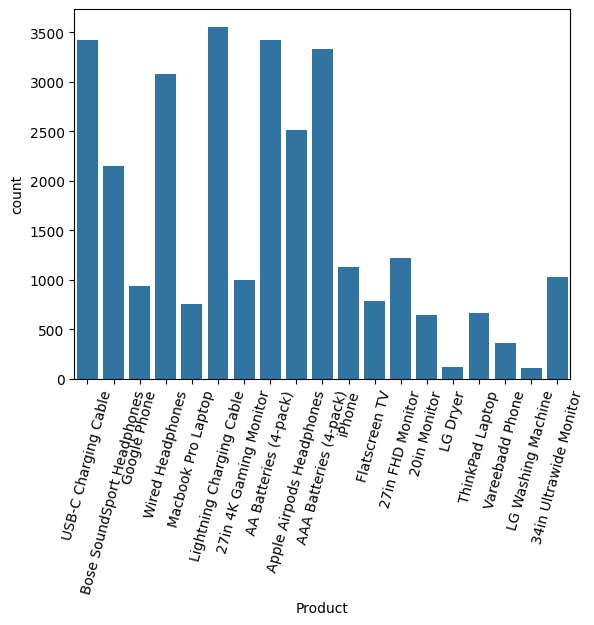

In [744]:
sns.countplot(data= df, x= "Product")
plt.xticks(rotation=75)
plt.show()

### <span style="color: green;"> Insight </span> : Accessories like charging cables and batteries are in high demand

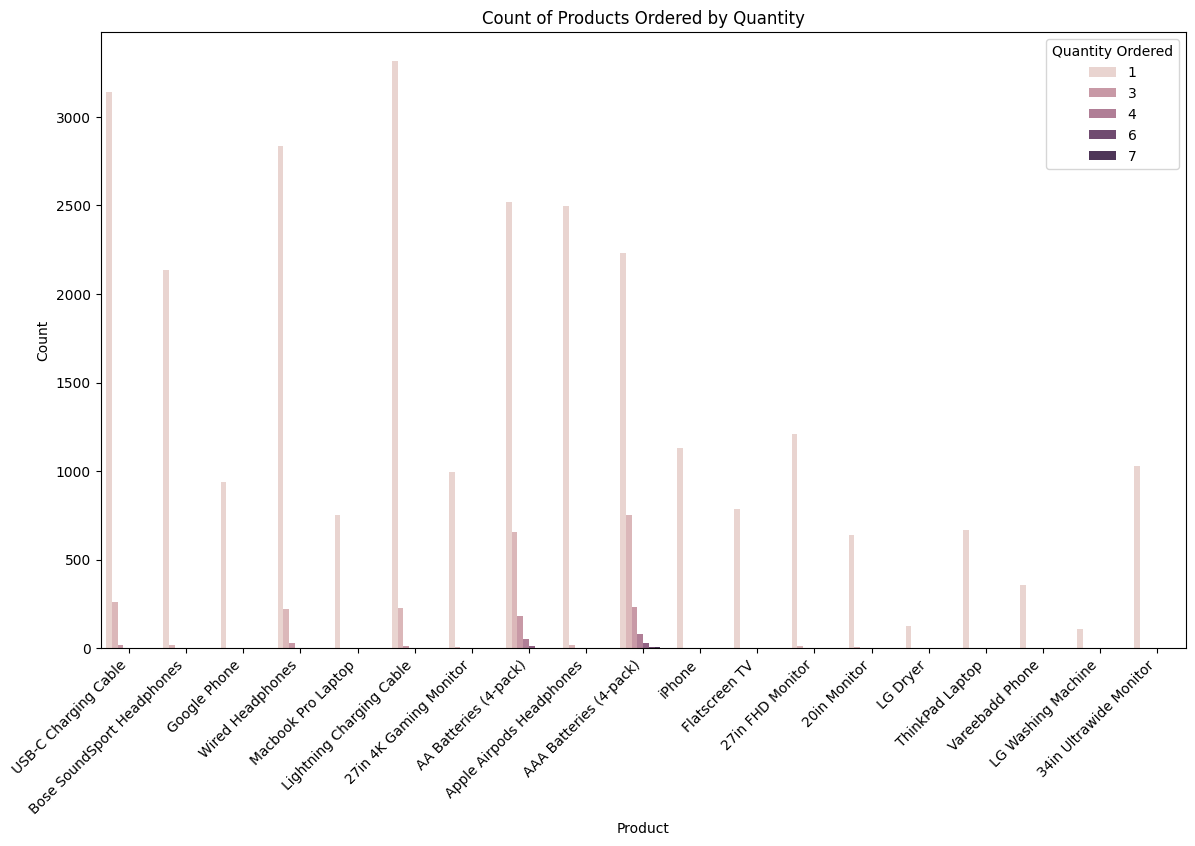

In [745]:
plt.figure(figsize=(14, 8))

# Plot the count of products ordered with hue based on quantity ordered
sns.countplot(data=df, x="Product", hue="Quantity Ordered")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add titles and labels for clarity
plt.title('Count of Products Ordered by Quantity')
plt.xlabel('Product')
plt.ylabel('Count')

# Display the plot
plt.show()

### <span style="color: green;"> Insight </span> : USB-C Charging Cable , Lightning Charging Cable and Battries are frequently ordered in higher quantities
### <span style="color: yellow;"> Suggestion </span> : Ensure high inventory levels for these items to meet demand and avoid stockouts

In [746]:
df["Product"]

0              USB-C Charging Cable
2        Bose SoundSport Headphones
3                      Google Phone
4                  Wired Headphones
5                  Wired Headphones
                    ...            
30389    Bose SoundSport Headphones
30390        AAA Batteries (4-pack)
30391         AA Batteries (4-pack)
30392          USB-C Charging Cable
30393         AA Batteries (4-pack)
Name: Product, Length: 30246, dtype: object

In [747]:
top_selling_by_quantity = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

print("Top-Selling Products by Quantity Ordered:")
print(top_selling_by_quantity.head(10))


top_selling_by_sales = df.groupby('Product')['Price'].sum().sort_values(ascending=False)

print("\nTop-Selling Products by Total Price:")
print(top_selling_by_sales.head(10))

Top-Selling Products by Quantity Ordered:
Product
AAA Batteries (4-pack)        4955
AA Batteries (4-pack)         4648
Lightning Charging Cable      3812
USB-C Charging Cable          3732
Wired Headphones              3356
Apple Airpods Headphones      2535
Bose SoundSport Headphones    2168
27in FHD Monitor              1229
iPhone                        1133
34in Ultrawide Monitor        1034
Name: Quantity Ordered, dtype: int32

Top-Selling Products by Total Price:
Product
Macbook Pro Laptop            1281800.00
iPhone                         793100.00
ThinkPad Laptop                666993.33
Google Phone                   564600.00
34in Ultrawide Monitor         392909.66
27in 4K Gaming Monitor         391549.96
Apple Airpods Headphones       380250.00
Flatscreen TV                  237000.00
Bose SoundSport Headphones     216778.32
27in FHD Monitor               184337.71
Name: Price, dtype: float64


### <span style="color: green;"> Insight </span>: Macbook Pro Laptop and iPhone are the highest revenue generators despite their lower quantity ordered, indicating their high price points.

#### That is it for product column. The only task left for this column is transformation \ encoding, and i will leave this until the end

### 2- 	Order Date column analysis

In [748]:
df["Order Date"].sample()

20233    08/13/19 14:12
Name: Order Date, dtype: object

### This column contains (day/motnth/year min:hour). A total of 4 crucial information in one column. Therefore, it would be logical to split the information in seprates column

In [749]:
df["Month"]=df["Order Date"].apply(lambda x : str(x).split("/")[0])

In [750]:
df["Day"]=df["Order Date"].apply(lambda x : str(x).split("/")[1])

In [751]:
df["Order Date"].apply(lambda x : str(x).split("/")[2][:2]).value_counts()

Order Date
19    30246
Name: count, dtype: int64

### The year turned out to be 2019 across all rows. Therefore, we can safeley  <span style="color: Red;"> Remove </span> it 

In [752]:
df["Time"] = df["Order Date"].apply(lambda x : str(x).split("/")[2][2:].strip())

### Being informed of wether the transacation happened at day or at night can be benfical for our analysis and maybe feature eng for predcting the total price

In [753]:
df['AM/PM']= df["Time"].apply(lambda x: "PM" if(int(x[:2]) >= 12) else "AM")

### Now we can safelay <span style="color: Red;"> Remove </span> the Date column

In [754]:
df= df.drop("Order Date", axis = 1)

<Axes: xlabel='Month', ylabel='count'>

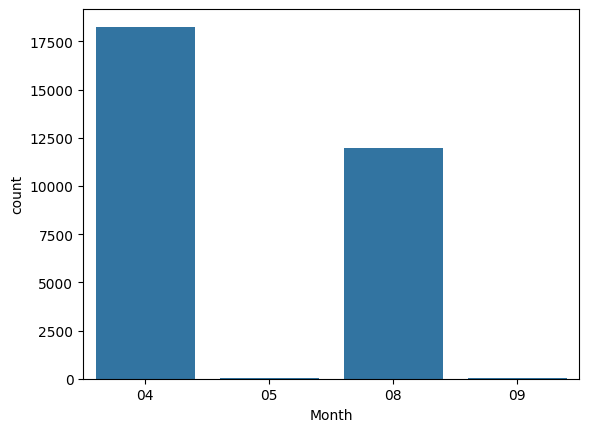

In [755]:
sns.countplot(x= "Month", data= df)

### There only 4 months in this dataset with uneven frequncy

<Axes: xlabel='AM/PM', ylabel='count'>

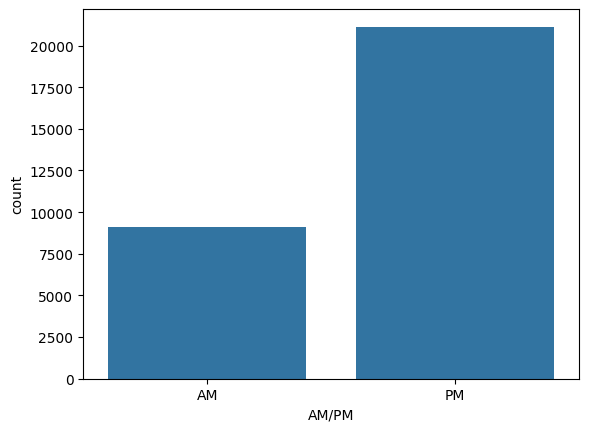

In [756]:
sns.countplot(x= "AM/PM", data= df)

### <span style="color: green;"> Insight </span> : PM purchases are more than double of that of  AM purchases
### <span style="color: yellow;"> Suggestion </span> : Schedule promotions, emails, and ads for the afternoon and evening to align with peak purchasing times

In [757]:
df["AM/PM"].value_counts() / len(df)

AM/PM
PM    0.698638
AM    0.301362
Name: count, dtype: float64

In [758]:
df["Day"]= df["Day"].astype(int)
visulDf= df.sort_values(by ="Day")

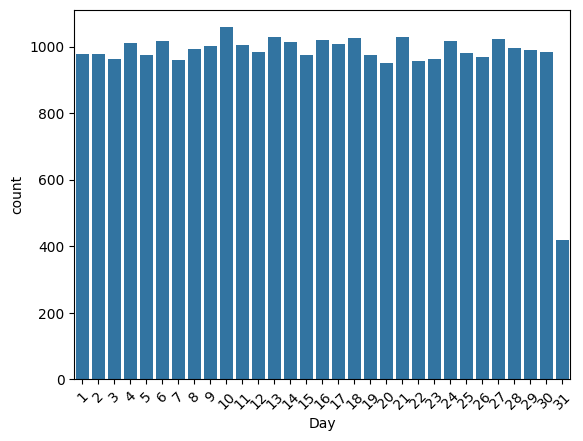

In [759]:
sns.countplot(x= "Day", data= visulDf)
plt.xticks(rotation = 45)
plt.show()

### <span style="color: green;"> Insight </span> : All days of the month have appoximatly the same number of purchases except the last day (31), which is expected since not all months have a 31th day
### <span style="color: yellow;"> Suggestion </span> : Ensure that this does not indicate an issue with sales performance on the day

### 3- 	Quantity Ordered column analysis

In [760]:
df["Quantity Ordered"].describe()

count    30246.000000
mean         1.124446
std          0.441656
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: Quantity Ordered, dtype: float64

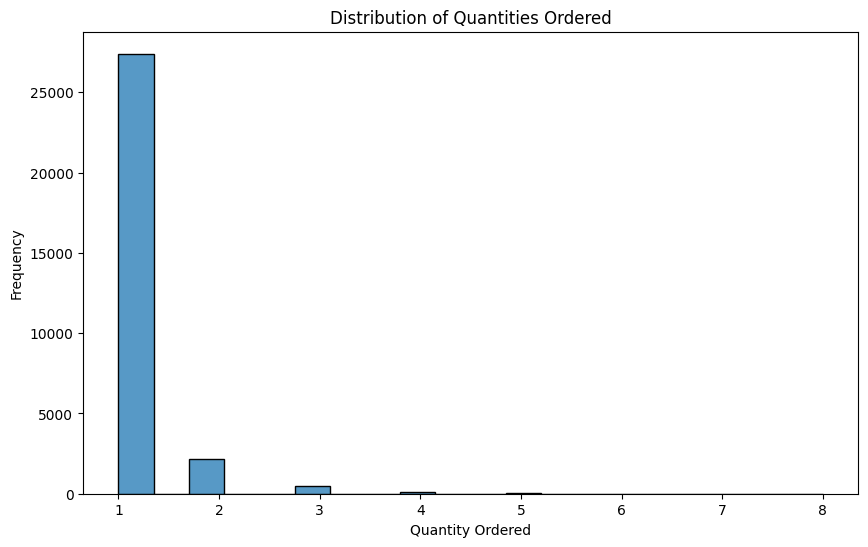

In [761]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity Ordered'], bins=20)
plt.title('Distribution of Quantities Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()

In [762]:
df.groupby("AM/PM")["Quantity Ordered"].value_counts()

AM/PM  Quantity Ordered
AM     1                    8250
       2                     672
       3                     130
       4                      39
       5                      17
       6                       4
       7                       2
       8                       1
PM     1                   19155
       2                    1512
       3                     342
       4                      89
       5                      23
       6                       7
       7                       3
Name: count, dtype: int64

In [763]:
oneQuantAm = df.groupby("AM/PM")["Quantity Ordered"].value_counts().iloc[0]


In [764]:
moreQuantAm= df.groupby("AM/PM")["Quantity Ordered"].value_counts().iloc[0:8].sum()

oneQuantAm/ moreQuantAm

0.9051014810751509

In [765]:
df.groupby("AM/PM")["Quantity Ordered"].value_counts().iloc[8] / df.groupby("AM/PM")["Quantity Ordered"].value_counts().iloc[8:15].sum()


0.9064880980549903

In [766]:
df.groupby("AM/PM")["Quantity Ordered"].value_counts()

AM/PM  Quantity Ordered
AM     1                    8250
       2                     672
       3                     130
       4                      39
       5                      17
       6                       4
       7                       2
       8                       1
PM     1                   19155
       2                    1512
       3                     342
       4                      89
       5                      23
       6                       7
       7                       3
Name: count, dtype: int64

<Axes: xlabel='AM/PM', ylabel='count'>

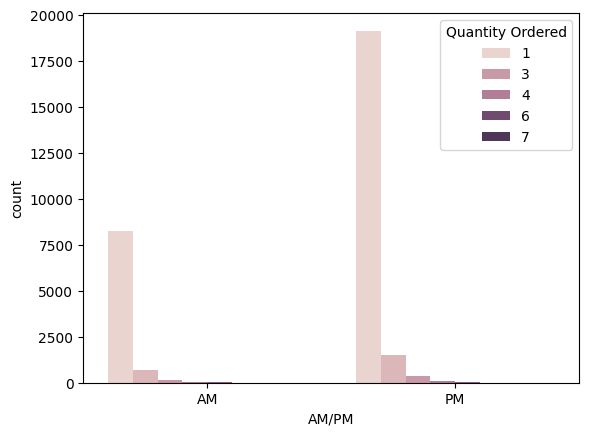

In [767]:
sns.countplot(x= "AM/PM", data = df, hue = "Quantity Ordered")

### 4- Purchase Address column analysis

In [768]:
df["Purchase Address"]

0                   917 1st St, Dallas, TX 75001
2              682 Chestnut St, Boston, MA 02215
3           669 Spruce St, Los Angeles, CA 90001
4           669 Spruce St, Los Angeles, CA 90001
5              333 8th St, Los Angeles, CA 90001
                          ...                   
30389    868 Hickory St, San Francisco, CA 94016
30390          206 Lakeview St, Boston, MA 02215
30391             568 13th St, Seattle, WA 98101
30392     495 Walnut St, San Francisco, CA 94016
30393         738 Park St, Los Angeles, CA 90001
Name: Purchase Address, Length: 30246, dtype: object

### We will do feature eng for this column for same reason we did for Order Date column

In [769]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[2].split()[0].strip())

df['Zip Code'] = df['Purchase Address'].apply(lambda x: x.split(',')[2].split()[1].strip())

df[['Purchase Address', 'City', 'State', 'Zip Code']].head()

,Purchase Address,City,State,Zip Code
0,"917 1st St, Dallas, TX 75001",Dallas,TX,75001
2,"682 Chestnut St, Boston, MA 02215",Boston,MA,02215
3,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,90001
4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,90001
5,"333 8th St, Los Angeles, CA 90001",Los Angeles,CA,90001


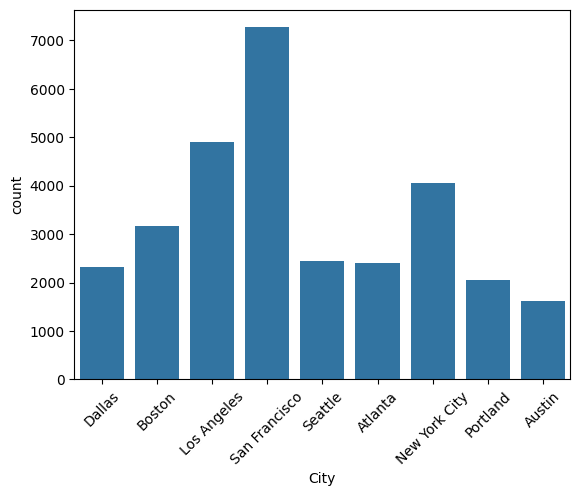

In [770]:
sns.countplot(x= "City", data = df)
plt.xticks(rotation = 45)
plt.show()



### <span style="color: green;"> Insight </span> : San Francisco,  Los Angeles and New York City have the highest number of purchases 
### <span style="color: yellow;"> Suggestion </span> : Given the high volume of purchases in San Francisco, Los Angeles, and New York City, consider focusing marketing efforts and resources in these areas


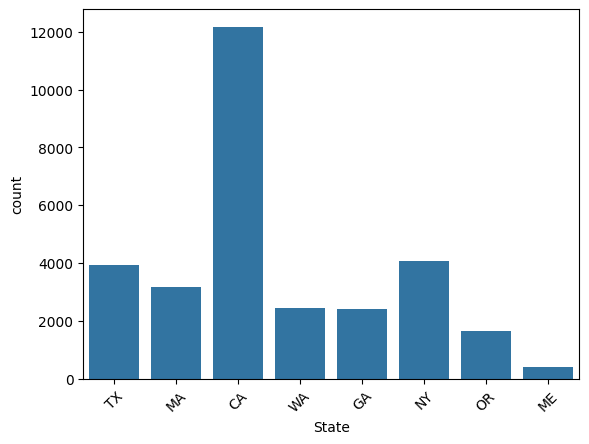

In [771]:
sns.countplot(x= "State", data = df)
plt.xticks(rotation = 45)
plt.show()

In [772]:
df = df.drop(columns=["Purchase Address"])

### 5- Price  column

In [773]:
df = df.drop(columns=["Price Each"])


In [774]:
df["Price"].describe()

count    30246.000000
mean       186.486524
std        332.272354
min          2.990000
25%         11.950000
50%         14.950000
75%        150.000000
max       3400.000000
Name: Price, dtype: float64

### The std indicates a significant variability in price

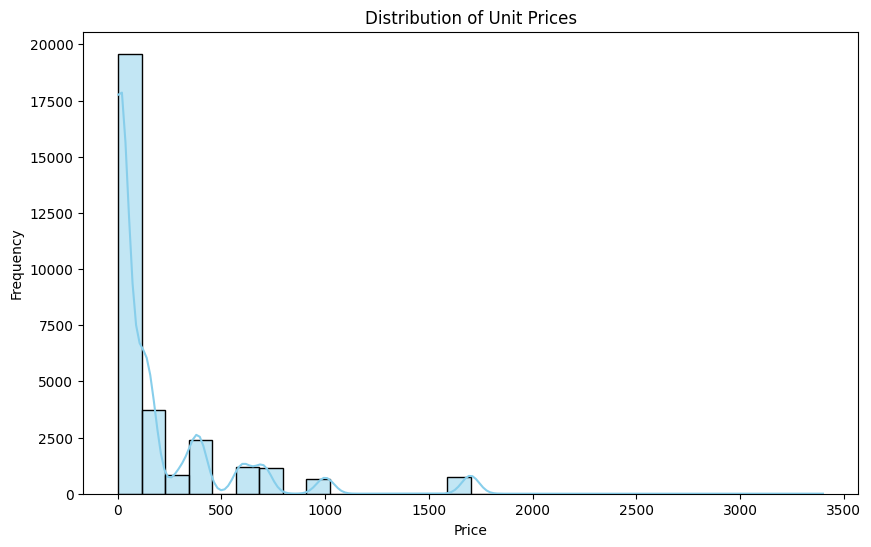

In [775]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Unit Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

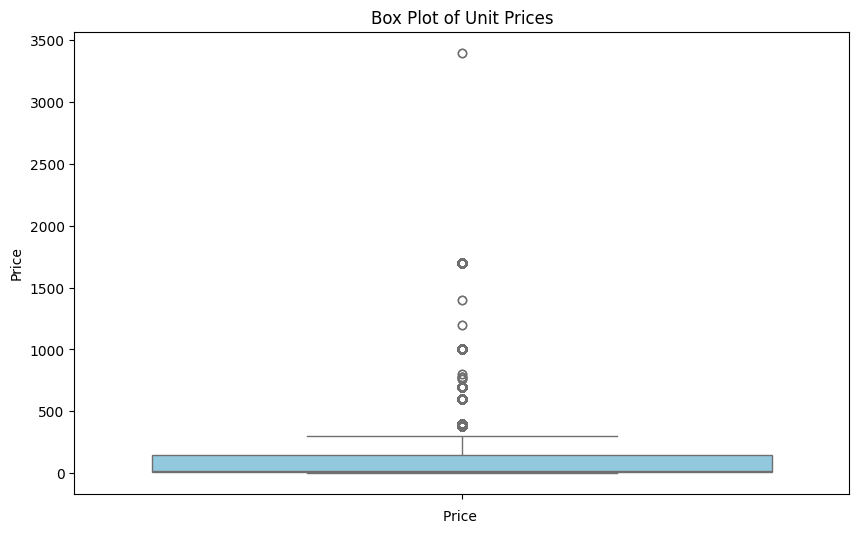

In [776]:
plt.figure(figsize=(10, 6))
sns.boxplot(y= df['Price'], color='skyblue')
plt.title('Box Plot of Unit Prices')
plt.xlabel('Price ')
plt.show()

### Lets investigate the outliers

In [777]:
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)

IQR = Q3 - Q1

upper_whisker = Q3 + 1.5 * IQR

In [778]:
df[df["Price"]> upper_whisker]["Product"]

3                  Google Phone
9            Macbook Pro Laptop
11                 Google Phone
13       27in 4K Gaming Monitor
18                 Google Phone
                  ...          
30375    27in 4K Gaming Monitor
30378        LG Washing Machine
30381    27in 4K Gaming Monitor
30382                    iPhone
30385    34in Ultrawide Monitor
Name: Product, Length: 6114, dtype: object

### We can see the prodcuts that have a significantly high prices are Phones and Laptops

###  While prices above upper_whisker are statistically considered outliers, based on domain knowledge it is reasnoble for these products to have much higher prices than other products

### For simplcity, i will remove Macbook Pro Laptop with Quantity two ( which are only two rows)

In [779]:
indx = df.sort_values(by = "Price", ascending=False).head(2).index
df = df.drop(indx)

In [780]:
df

,Product,Quantity Ordered,Price,Month,Day,Time,AM/PM,City,State,Zip Code
0,USB-C Charging Cable,2,23.90,04,19,08:46,AM,Dallas,TX,75001
2,Bose SoundSport Headphones,1,99.99,04,7,22:30,PM,Boston,MA,02215
3,Google Phone,1,600.00,04,12,14:38,PM,Los Angeles,CA,90001
4,Wired Headphones,1,11.99,04,12,14:38,PM,Los Angeles,CA,90001
5,Wired Headphones,1,11.99,04,30,09:27,AM,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...,...
30389,Bose SoundSport Headphones,1,99.99,08,29,22:19,PM,San Francisco,CA,94016
30390,AAA Batteries (4-pack),3,8.97,08,31,16:26,PM,Boston,MA,02215
30391,AA Batteries (4-pack),1,3.84,08,2,07:25,AM,Seattle,WA,98101
30392,USB-C Charging Cable,1,11.95,08,8,12:10,PM,San Francisco,CA,94016


### It needs to be scaled 

In [781]:
df['Price'] = np.log1p(df['Price'])

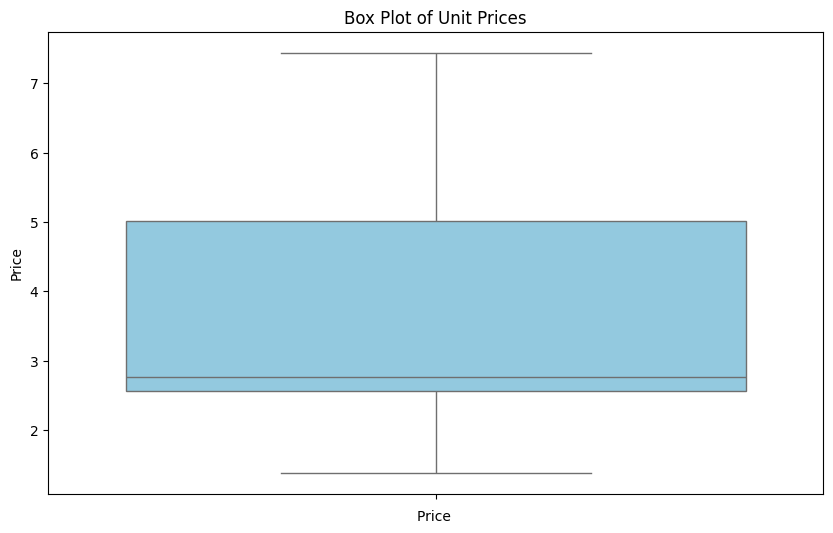

In [782]:
plt.figure(figsize=(10, 6))
sns.boxplot(y= df['Price'], color='skyblue')
plt.title('Box Plot of Unit Prices')
plt.xlabel('Price ')
plt.show()

In [783]:
df

,Product,Quantity Ordered,Price,Month,Day,Time,AM/PM,City,State,Zip Code
0,USB-C Charging Cable,2,3.214868,04,19,08:46,AM,Dallas,TX,75001
2,Bose SoundSport Headphones,1,4.615022,04,7,22:30,PM,Boston,MA,02215
3,Google Phone,1,6.398595,04,12,14:38,PM,Los Angeles,CA,90001
4,Wired Headphones,1,2.564180,04,12,14:38,PM,Los Angeles,CA,90001
5,Wired Headphones,1,2.564180,04,30,09:27,AM,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...,...
30389,Bose SoundSport Headphones,1,4.615022,08,29,22:19,PM,San Francisco,CA,94016
30390,AAA Batteries (4-pack),3,2.299581,08,31,16:26,PM,Boston,MA,02215
30391,AA Batteries (4-pack),1,1.576915,08,2,07:25,AM,Seattle,WA,98101
30392,USB-C Charging Cable,1,2.561096,08,8,12:10,PM,San Francisco,CA,94016


In [784]:
# Extract unique products and assign ProductID
products_df = df[['Product']].drop_duplicates().reset_index(drop=True)
products_df['ProductID'] = products_df.index + 1

# Extract unique locations and assign LocationID
locations_df = df[['City', 'State', 'Zip Code']].drop_duplicates().reset_index(drop=True)
locations_df['LocationID'] = locations_df.index + 1

# Merge ProductID and LocationID back into the original dataframe
df2 = df.merge(products_df, on='Product').merge(locations_df, on=['City', 'State', 'Zip Code'])

In [785]:
df2

,Product,Quantity Ordered,Price,Month,Day,Time,AM/PM,City,State,Zip Code,ProductID,LocationID
0,USB-C Charging Cable,2,3.214868,04,19,08:46,AM,Dallas,TX,75001,1,1
1,Bose SoundSport Headphones,1,4.615022,04,7,22:30,PM,Boston,MA,02215,2,2
2,Google Phone,1,6.398595,04,12,14:38,PM,Los Angeles,CA,90001,3,3
3,Wired Headphones,1,2.564180,04,12,14:38,PM,Los Angeles,CA,90001,4,3
4,Wired Headphones,1,2.564180,04,30,09:27,AM,Los Angeles,CA,90001,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
30239,Bose SoundSport Headphones,1,4.615022,08,29,22:19,PM,San Francisco,CA,94016,2,4
30240,AAA Batteries (4-pack),3,2.299581,08,31,16:26,PM,Boston,MA,02215,10,2
30241,AA Batteries (4-pack),1,1.576915,08,2,07:25,AM,Seattle,WA,98101,8,5
30242,USB-C Charging Cable,1,2.561096,08,8,12:10,PM,San Francisco,CA,94016,1,4


In [786]:
df2

,Product,Quantity Ordered,Price,Month,Day,Time,AM/PM,City,State,Zip Code,ProductID,LocationID
0,USB-C Charging Cable,2,3.214868,04,19,08:46,AM,Dallas,TX,75001,1,1
1,Bose SoundSport Headphones,1,4.615022,04,7,22:30,PM,Boston,MA,02215,2,2
2,Google Phone,1,6.398595,04,12,14:38,PM,Los Angeles,CA,90001,3,3
3,Wired Headphones,1,2.564180,04,12,14:38,PM,Los Angeles,CA,90001,4,3
4,Wired Headphones,1,2.564180,04,30,09:27,AM,Los Angeles,CA,90001,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
30239,Bose SoundSport Headphones,1,4.615022,08,29,22:19,PM,San Francisco,CA,94016,2,4
30240,AAA Batteries (4-pack),3,2.299581,08,31,16:26,PM,Boston,MA,02215,10,2
30241,AA Batteries (4-pack),1,1.576915,08,2,07:25,AM,Seattle,WA,98101,8,5
30242,USB-C Charging Cable,1,2.561096,08,8,12:10,PM,San Francisco,CA,94016,1,4


In [787]:
products_df



,Product,ProductID
0,USB-C Charging Cable,1
1,Bose SoundSport Headphones,2
2,Google Phone,3
3,Wired Headphones,4
4,Macbook Pro Laptop,5
5,Lightning Charging Cable,6
6,27in 4K Gaming Monitor,7
7,AA Batteries (4-pack),8
8,Apple Airpods Headphones,9
9,AAA Batteries (4-pack),10


In [788]:
""" import mysql.connector
products_df = df2[['Product', 'ProductID']].drop_duplicates().reset_index(drop=True)
locations_df = df2[['City', 'State', 'Zip Code', 'LocationID']].drop_duplicates().reset_index(drop=True)

config = {
    'user': 'root',
    'password': 'A123a321df@',
    'host': '127.0.0.1',
    'database': 'my_database',
    'raise_on_warnings': True
}
conn = mysql.connector.connect(**config)
cursor = conn.cursor()


for _, row in products_df.iterrows():
    cursor.execute(
        "INSERT INTO Products (ProductID, ProductName) VALUES (%s, %s)",
        (row['ProductID'], row['Product'])
    )

for _, row in locations_df.iterrows():
    cursor.execute(
        "INSERT INTO Locations (LocationID, City, State, ZipCode) VALUES (%s, %s, %s, %s)",
        (row['LocationID'], row['City'], row['State'], row['Zip Code'])
    )


orders_df = df2[['Quantity Ordered', 'Price', 'Month', 'Day', 'Time', 'AM/PM', 'ProductID', 'LocationID']]
orders_df['Price'] = orders_df['Price'].astype(float).round(2)
orders_df['Quantity Ordered'] = orders_df['Quantity Ordered'].astype(int)

print(orders_df.head())
print(orders_df.dtypes)


for _, row in orders_df.iterrows():
    cursor.execute(
        "INSERT INTO Orders (QuantityOrdered, Price, Month, Day, Time, AM_PM, ProductID, LocationID) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)",
        (row['Quantity Ordered'], row['Price'], row['Month'], row['Day'], row['Time'], row['AM/PM'], row['ProductID'], row['LocationID'])
    )

conn.commit()

cursor.close()
conn.close()

print("Data inserted successfully") """

' import mysql.connector\nproducts_df = df2[[\'Product\', \'ProductID\']].drop_duplicates().reset_index(drop=True)\nlocations_df = df2[[\'City\', \'State\', \'Zip Code\', \'LocationID\']].drop_duplicates().reset_index(drop=True)\n\nconfig = {\n    \'user\': \'root\',\n    \'password\': \'A123a321df@\',\n    \'host\': \'127.0.0.1\',\n    \'database\': \'my_database\',\n    \'raise_on_warnings\': True\n}\nconn = mysql.connector.connect(**config)\ncursor = conn.cursor()\n\n\nfor _, row in products_df.iterrows():\n    cursor.execute(\n        "INSERT INTO Products (ProductID, ProductName) VALUES (%s, %s)",\n        (row[\'ProductID\'], row[\'Product\'])\n    )\n\nfor _, row in locations_df.iterrows():\n    cursor.execute(\n        "INSERT INTO Locations (LocationID, City, State, ZipCode) VALUES (%s, %s, %s, %s)",\n        (row[\'LocationID\'], row[\'City\'], row[\'State\'], row[\'Zip Code\'])\n    )\n\n\norders_df = df2[[\'Quantity Ordered\', \'Price\', \'Month\', \'Day\', \'Time\', \'AM/P

In [789]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [790]:
df["Quantity Ordered"].value_counts()

Quantity Ordered
1    27405
2     2182
3      472
4      128
5       40
6       11
7        5
8        1
Name: count, dtype: int64

In [791]:
df[["Price", "Quantity Ordered"]].corr()

,Price,Quantity Ordered
Price,1.000000,-0.183307
Quantity Ordered,-0.183307,1.000000


In [792]:
df['Quantity Ordered'] = np.log1p(df['Quantity Ordered']) 


In [793]:
df

,Product,Quantity Ordered,Price,Month,Day,Time,AM/PM,City,State,Zip Code
0,USB-C Charging Cable,1.098612,3.214868,04,19,08:46,AM,Dallas,TX,75001
2,Bose SoundSport Headphones,0.693147,4.615022,04,7,22:30,PM,Boston,MA,02215
3,Google Phone,0.693147,6.398595,04,12,14:38,PM,Los Angeles,CA,90001
4,Wired Headphones,0.693147,2.564180,04,12,14:38,PM,Los Angeles,CA,90001
5,Wired Headphones,0.693147,2.564180,04,30,09:27,AM,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...,...
30389,Bose SoundSport Headphones,0.693147,4.615022,08,29,22:19,PM,San Francisco,CA,94016
30390,AAA Batteries (4-pack),1.386294,2.299581,08,31,16:26,PM,Boston,MA,02215
30391,AA Batteries (4-pack),0.693147,1.576915,08,2,07:25,AM,Seattle,WA,98101
30392,USB-C Charging Cable,0.693147,2.561096,08,8,12:10,PM,San Francisco,CA,94016


In [794]:
df = pd.get_dummies(df, columns=['Product'], prefix='Product')


In [795]:
df = pd.get_dummies(df, columns=['Month'], prefix='Month')


In [796]:
df['Hour'] = df['Time'].apply(lambda x: int(x.split(':')[0]) + (12 if x.endswith('PM') and x.split(':')[0] != '12' else 0))


In [797]:
df = pd.get_dummies(df, columns=['AM/PM'], prefix='AM_PM')


In [798]:
df = df.drop("Time" , axis= 1 )


In [799]:
df = df.drop("Zip Code" , axis= 1 )


In [800]:
df = df.drop("State" , axis= 1 )


In [801]:
df['Day_sin'] = np.sin(2 * np.pi * df['Day']/31)
df['Day_cos'] = np.cos(2 * np.pi * df['Day']/31)

In [802]:
df = pd.get_dummies(df, columns=['City'], prefix='City')


In [803]:
df.columns

Index(['Quantity Ordered', 'Price', 'Day', 'Product_20in Monitor',
       'Product_27in 4K Gaming Monitor', 'Product_27in FHD Monitor',
       'Product_34in Ultrawide Monitor', 'Product_AA Batteries (4-pack)',
       'Product_AAA Batteries (4-pack)', 'Product_Apple Airpods Headphones',
       'Product_Bose SoundSport Headphones', 'Product_Flatscreen TV',
       'Product_Google Phone', 'Product_LG Dryer',
       'Product_LG Washing Machine', 'Product_Lightning Charging Cable',
       'Product_Macbook Pro Laptop', 'Product_ThinkPad Laptop',
       'Product_USB-C Charging Cable', 'Product_Vareebadd Phone',
       'Product_Wired Headphones', 'Product_iPhone', 'Month_04', 'Month_05',
       'Month_08', 'Month_09', 'Hour', 'AM_PM_AM', 'AM_PM_PM', 'Day_sin',
       'Day_cos', 'City_Atlanta', 'City_Austin', 'City_Boston', 'City_Dallas',
       'City_Los Angeles', 'City_New York City', 'City_Portland',
       'City_San Francisco', 'City_Seattle'],
      dtype='object')

In [804]:
df

,Quantity Ordered,Price,Day,Product_20in Monitor,Product_27in 4K Gaming Monitor,Product_27in FHD Monitor,Product_34in Ultrawide Monitor,Product_AA Batteries (4-pack),Product_AAA Batteries (4-pack),Product_Apple Airpods Headphones,...,Day_cos,City_Atlanta,City_Austin,City_Boston,City_Dallas,City_Los Angeles,City_New York City,City_Portland,City_San Francisco,City_Seattle
0,1.098612,3.214868,19,False,False,False,False,False,False,False,...,-0.758758,False,False,False,True,False,False,False,False,False
2,0.693147,4.615022,7,False,False,False,False,False,False,False,...,0.151428,False,False,True,False,False,False,False,False,False
3,0.693147,6.398595,12,False,False,False,False,False,False,False,...,-0.758758,False,False,False,False,True,False,False,False,False
4,0.693147,2.564180,12,False,False,False,False,False,False,False,...,-0.758758,False,False,False,False,True,False,False,False,False
5,0.693147,2.564180,30,False,False,False,False,False,False,False,...,0.979530,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30389,0.693147,4.615022,29,False,False,False,False,False,False,False,...,0.918958,False,False,False,False,False,False,False,True,False
30390,1.386294,2.299581,31,False,False,False,False,False,True,False,...,1.000000,False,False,True,False,False,False,False,False,False
30391,0.693147,1.576915,2,False,False,False,False,True,False,False,...,0.918958,False,False,False,False,False,False,False,False,True
30392,0.693147,2.561096,8,False,False,False,False,False,False,False,...,-0.050649,False,False,False,False,False,False,False,True,False


In [805]:
cols = df.columns.drop("Price")
df[cols]= df[cols].astype(int)

In [806]:
df['Price'] = np.log1p(df['Price']) 


In [807]:
X = df.drop(columns=['Price'])  # Features
y = df['Price'] 

In [808]:
noise_factor = 0.083
X= X + noise_factor * np.random.normal(size=X.shape)

In [809]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [810]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.016331325635062496
R-squared: 0.8892941094034049


In [811]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R-squared scores: {cv_scores}')
print(f'Mean Cross-Validation R-squared: {cv_scores.mean()}')

Cross-Validation R-squared scores: [0.88987945 0.89149613 0.88928668 0.89479145 0.89005702]
Mean Cross-Validation R-squared: 0.8911021441299303


### Decide what transformation to do on Price
### Encode & Transform
### Linear Reg (try to get best accurasy)

### Clustering

In [812]:
-

SyntaxError: invalid syntax (476313318.py, line 1)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[['Price Each', 'Quantity Ordered']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

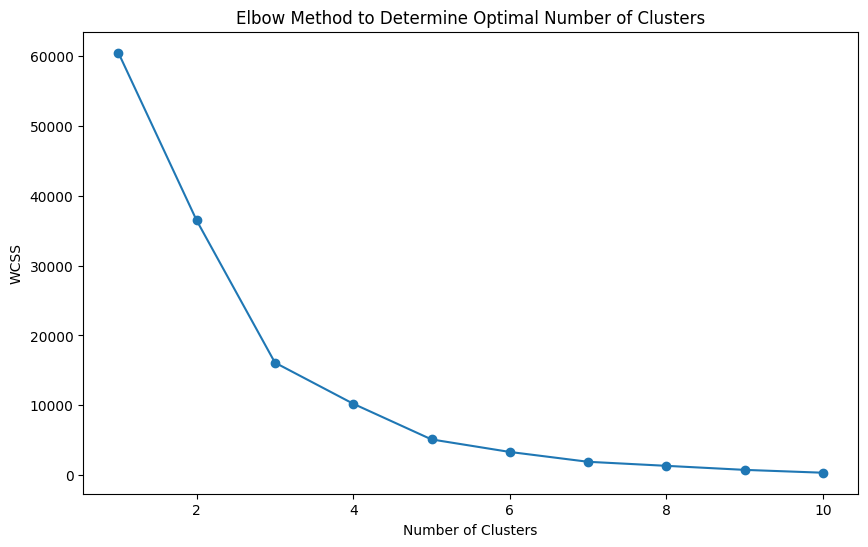

In [ ]:
wcss = []  

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### The sharp decrease happens at around 3 so i iwll chose k=3

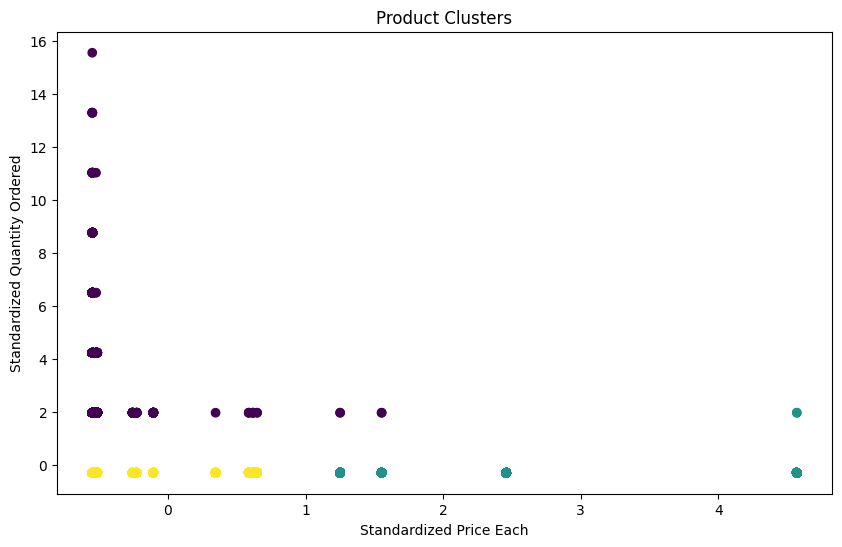

In [ ]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('Product Clusters')
plt.xlabel('Standardized Price Each')
plt.ylabel('Standardized Quantity Ordered')
plt.show()

### It can be seen that the price and quntity cluster the data very well to three clusters (low, med, high)prices. 
### <span style="color: yellow;"> Yellow </span>: Low-Priced and Low-Quantity Product
### <span style="color: purple;"> Purple </span>: Mixed-Price and High-Quantity Productss

### <span style="color: Green;"> Green </span>: High-Priced and Low-Quantity Products


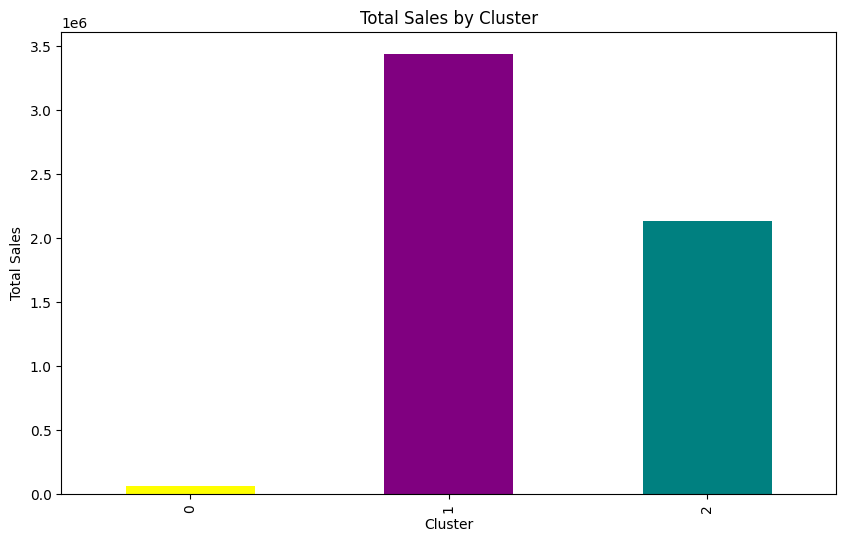

In [ ]:
cluster_sales = df.groupby('Cluster')['Price'].sum()

# Plot total sales for each cluster
plt.figure(figsize=(10, 6))
cluster_sales.plot(kind='bar', color=['yellow', 'purple', 'teal'])
plt.title('Total Sales by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Sales')
plt.show()

C:\Users\ggfor\AppData\Local\Temp\ipykernel_16716\4165379267.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby([pd.Grouper(freq='M'), 'Cluster'])['Price'].sum().unstack()


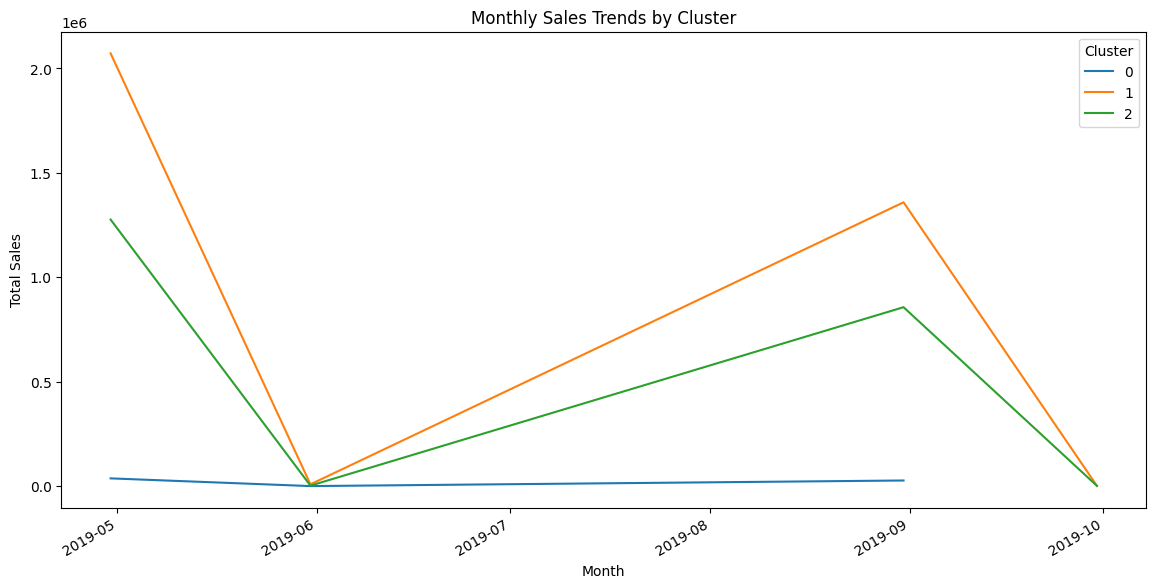